In [1]:
import matplotlib


import matplotlib.pyplot as plt 
from scipy import signal
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d


import utils
import seaborn as sns

def get_dr_from_ss(symbol_size, period):
    return 1/period*symbol_size

def interpolate_exponential(x_values, y_values, num_points):
    # Create interpolation function with kind='quadratic'
    interp_func = interp1d(x_values, y_values, kind='linear', fill_value='extrapolate')

    # Generate new x values for interpolation
    new_x_values = np.linspace(min(x_values), max(x_values), len(x_values) + num_points)

    # Interpolate the corresponding y values
    new_y_values = interp_func(new_x_values)

    return new_x_values, new_y_values

def zoom_fft(x, fs, max_freq, nfft):
    """take zoom fft

    Args:
        x (_type_): input signal
        fs (_type_): sampling frequency
        max_freq (_type_): max frequency we want fft to get
        nfft (_type_): number of fft bins 

    Returns:
        H, w: fft output and corresponding angle
    """
    H = signal.zoom_fft(x, fn=[0,max_freq], m=nfft, fs=fs)
    w = np.linspace(0, max_freq, nfft)

    return w, H

def find_closest_pt_idx(array, points):
    idxs = []
    for i in range(len(points)):
        diff = np.abs(array - points[i])
        idx = np.argmin(diff)
        idxs.append(idx)
    return idxs

# blue = '#1f77b4' 
# orange='#ff7f0e'
# green='#2ca02c'
color_map = sns.color_palette("cubehelix", 3).as_hex()

hatch_map = ['', '/', '//']

# Set seaborn style
sns.set(style="whitegrid")

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
# modeling first chirp
f_0 = 9e9
T_perd = 100e-6
fs = 40e9
T_sample = 1/fs

f_ramp = 1e9
T_ramp = 100e-6

t = np.arange(0, 1*(T_perd), T_sample)
chirp1 = np.sin(2*np.pi* (f_0 * t + 1/2*f_ramp/T_ramp*t**2) )

# modeling second chirp
f_0 = 9e9
T_perd = 100e-6
fs = 40e9
T_sample = 1/fs

f_ramp = 1e9
T_ramp = 85e-6

t = np.arange(0, 1*(T_perd), T_sample)
chirp2 = np.sin(2*np.pi* (f_0 * t + 1/2*f_ramp/T_ramp*t**2) )

# modeling third chiro
f_0 = 9e9
T_perd = 100e-6
fs = 40e9
T_sample = 1/fs

f_ramp = 1e9
T_ramp = 70e-6

t = np.arange(0, 1*(T_perd), T_sample)
chirp3 = np.sin(2*np.pi* (f_0 * t + 1/2*f_ramp/T_ramp*t**2) )

# modeling forth chirp
f_0 = 9e9
T_perd = 100e-6
fs = 40e9
T_sample = 1/fs

f_ramp = 1e9
T_ramp = 55e-6

t = np.arange(0, 1*(T_perd), T_sample)
chirp4 = np.sin(2*np.pi* (f_0 * t + 1/2*f_ramp/T_ramp*t**2) )

(9000000000.0, 10000000000.0)

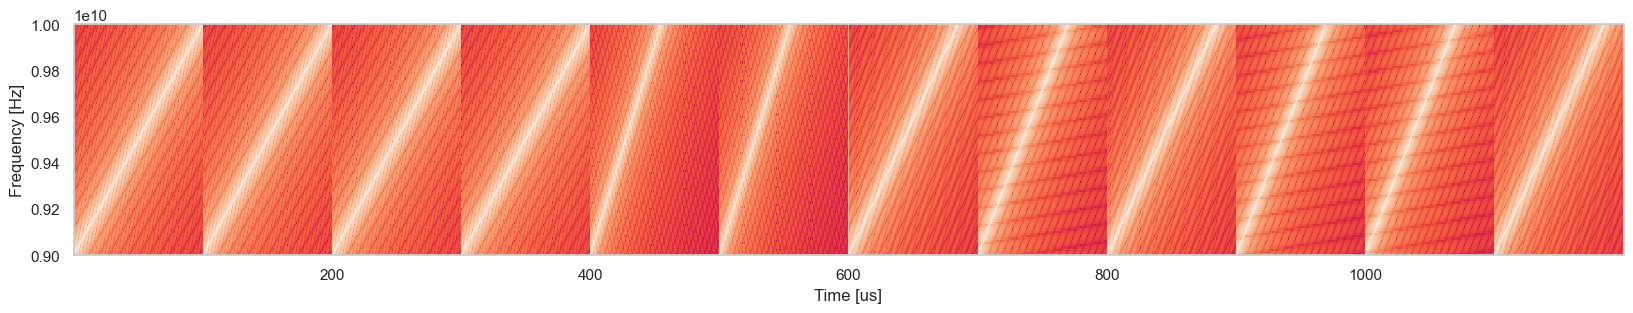

In [3]:
nfft = 1024*4


result = np.concatenate([chirp1, chirp1, chirp1, chirp1, chirp4, chirp4, chirp2, chirp3, chirp2, chirp3, chirp3, chirp2], axis=0)

f, t, S = signal.spectrogram(result, fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)
plt.figure(figsize=(20,3))
plt.pcolormesh(t*1e6, f, utils.sig2db(abs(S)))
# plt.title('Spectrogram for original chirp')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [us]')
# plt.colorbar()
plt.ylim([9e9,10e9])

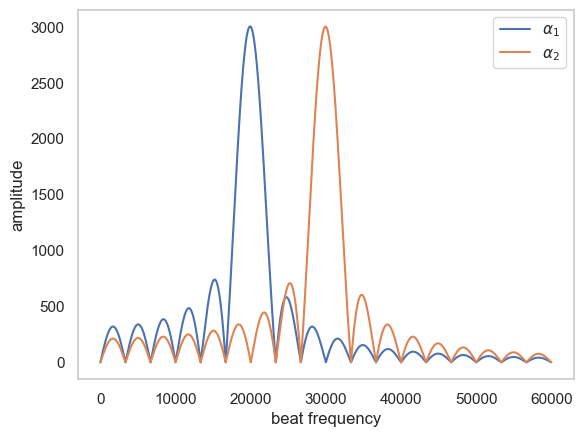

In [4]:
# generate signal with 3Hz
T = 300e-6         #sample period
fs = 20e6       #sample rate (Hz)

n = int(T*fs)
t = np.linspace(0, T, n)

freq1 = 20000
freq2 = 30000
sig1 = np.sin(2*freq1*np.pi*t)
sig2 = np.sin(2*freq2*np.pi*t)
w, H1 = utils.zoom_fft(sig1, fs=fs, max_freq=6e4, nfft=2**14)
w, H2 = utils.zoom_fft(sig2, fs=fs, max_freq=6e4, nfft=2**14)
plt.plot(w, np.abs(H1), label="$α_1$")
plt.plot(w, np.abs(H2), label="$α_2$")

plt.xlabel("beat frequency")
plt.ylabel("amplitude")

plt.grid()
plt.legend()


## BER calculation

### BER vs Symbol Size 

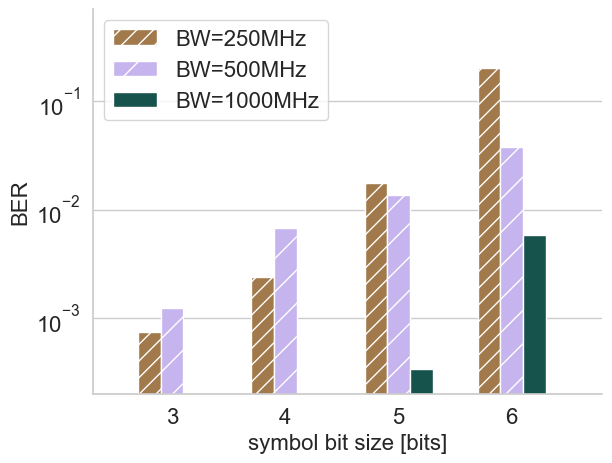

In [18]:
file = './Data/ber_result.csv'
df = pd.read_csv(file)
df_1000 = df[df['bandwidth']==1000]
df_500 = df[df['bandwidth']==500]
df_250 = df[df['bandwidth']==250]
ber_1000 = df_1000['BER'].to_numpy()[2:]
ber_500 = df_500['BER'].to_numpy()[2:]
ber_250 = df_250['BER'].to_numpy()[2:]

ber = [ber_1000[:6], ber_500[:6], ber_250[:6]]

# Set seaborn style
sns.set(style="whitegrid")

# Sample data
categories = ['BW=1000MHz', 'BW=500MHz', 'BW=250MHz']
measure_points = ['3', '4', '5', '6']

# Creating the bar plot
fig, ax = plt.subplots(figsize=(6.4, 4.8))
bar_width = 0.2
bar_positions = np.arange(len(measure_points))

# for i in [2]:
ax.bar(bar_positions + 0 * bar_width, ber[2], bar_width, label=categories[2], color=color_map[1], hatch=hatch_map[2])
ax.bar(bar_positions + 1 * bar_width, ber[1], bar_width, label=categories[1], color=color_map[2], hatch=hatch_map[1])
ax.bar(bar_positions + 2 * bar_width, ber[0], bar_width, label=categories[0], color=color_map[0], hatch=hatch_map[0])



# Adding labels, title, and legend
ax.set_xlabel('symbol bit size [bits]', fontsize=16)
ax.set_ylabel('BER', fontsize=16)
ax.set_xticks(bar_positions + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(measure_points, fontsize=16)
ax.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.yscale('log')
plt.ylim(2e-4, 0.7)
plt.xlim([-0.5,4])

plt.grid(axis='x', visible=False)

### BER vs SNR

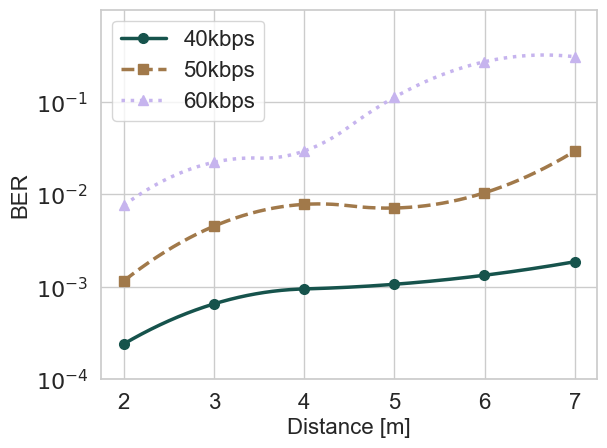

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

file = './Data/BER_SNR_result.csv'
df = pd.read_csv(file)
df_40 = df[df['size']==4]
df_50 = df[df['size']==5]
df_60 = df[df['size']==6]

dis_4 = df_40['dis'].to_numpy()
dis_5 = df_50['dis'].to_numpy()
dis_6 = df_60['dis'].to_numpy()

BER_4 = df_40['BER'].to_numpy()
BER_5 = df_50['BER'].to_numpy()
BER_6 = df_60['BER'].to_numpy()


BER_4_log = np.log10(BER_4)
BER_5_log = np.log10(BER_5)
BER_6_log = np.log10(BER_6)

# Linear interpolation function for each dataset
interp_4 = interp1d(dis_4, BER_4_log, kind='quadratic', fill_value='extrapolate')
interp_5 = interp1d(dis_5, BER_5_log, kind='quadratic', fill_value='extrapolate')
interp_6 = interp1d(dis_6, BER_6_log, kind='quadratic', fill_value='extrapolate')

# Generate new x values for a smoother curve
snr_interp = np.linspace(min(min(dis_4), min(dis_5), min(dis_6)), max(max(dis_4), max(dis_5), max(dis_6)), 1000)

# Interpolate y values using the linear interpolation functions
BER_interp_4 = interp_4(snr_interp)
BER_interp_5 = interp_5(snr_interp)
BER_interp_6 = interp_6(snr_interp)

# Plotting
plt.figure()


# Plot interpolated curves
marker_on = find_closest_pt_idx(snr_interp, [2,3,4,5,6,7])
plt.plot(snr_interp, BER_interp_4, label='40kbps', marker='o', markevery=marker_on, color=color_map[0], linestyle='solid', linewidth=2.5, markersize=7)
plt.plot(snr_interp, BER_interp_5, label='50kbps', marker='s', markevery=marker_on, color=color_map[1], linestyle='--', linewidth=2.5, markersize=7)
plt.plot(snr_interp, BER_interp_6, label='60kbps', marker='^', markevery=marker_on, color=color_map[2], linestyle='dotted', linewidth=2.5, markersize=7)

# Set labels and title
plt.xlabel('Distance [m]', fontsize=16)
plt.ylabel('BER', fontsize=16)
# plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(fontsize=16)
plt.yticks([-1, -2, -3, -4], ['$10^{-1}$', '$10^{-2}$', '$10^{-3}$', '$10^{-4}$'], fontsize=16)
plt.ylim([-4, 0])
# plt.title('SNR vs BER over different symbol size')

# Add legend
plt.legend(fontsize=16)

# Show the plot
plt.grid(True)

### BER vs SNR for cable length difference

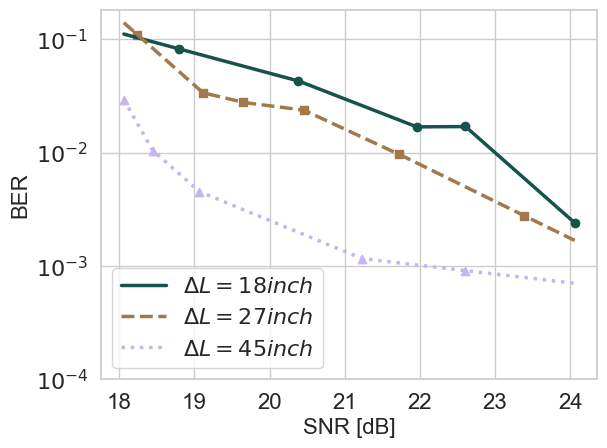

In [11]:
file = './Data/cable_length_result.csv'
df = pd.read_csv(file)
df_40 = df[df['length']==18]
df_50 = df[df['length']==27]
df_60 = df[df['length']==45]

snr_18 = df_40['snr'].to_numpy()
snr_27 = df_50['snr'].to_numpy()
snr_45 = df_60['snr'].to_numpy()

BER_18 = df_40['BER'].to_numpy()
BER_27 = df_50['BER'].to_numpy()
BER_45 = df_60['BER'].to_numpy()


BER_18_log = np.log10(BER_18)
BER_27_log = np.log10(BER_27)
BER_45_log = np.log10(BER_45)


# Linear interpolation function for each dataset
interp_4 = interp1d(snr_18, BER_18_log, kind='linear', fill_value='extrapolate')
interp_5 = interp1d(snr_27, BER_27_log, kind='linear', fill_value='extrapolate')
interp_6 = interp1d(snr_45, BER_45_log, kind='linear', fill_value='extrapolate')

# Generate new x values for a smoother curve
snr_interp = np.linspace(min(min(snr_18), min(snr_27), min(snr_45)), max(max(snr_18), max(snr_27), max(snr_45)), 1000)

# Interpolate y values using the linear interpolation functions
BER_interp_4 = interp_4(snr_interp)
BER_interp_5 = interp_5(snr_interp)
BER_interp_6 = interp_6(snr_interp)

# Plotting
plt.figure()

# Plot original data points
plt.scatter(snr_18, BER_18_log, color=color_map[0], marker='o')
plt.scatter(snr_27, BER_27_log, color=color_map[1], marker='s')
plt.scatter(snr_45, BER_45_log, color=color_map[2], marker='^')

# Plot interpolated curves
plt.plot(snr_interp, BER_interp_4, label='$\Delta L = 18inch$', color=color_map[0], linestyle='solid', linewidth=2.5, markersize=7)
plt.plot(snr_interp, BER_interp_5, label='$\Delta L = 27inch$', color=color_map[1], linestyle='--', linewidth=2.5, markersize=7)
plt.plot(snr_interp, BER_interp_6, label='$\Delta L = 45inch$', color=color_map[2], linestyle='dotted', linewidth=2.5, markersize=7)

# Set labels and title
plt.xlabel('SNR [dB]', fontsize=16)
plt.ylabel('BER', fontsize=16)
# plt.yscale('log')  # Set y-axis to logarithmic scale
# plt.title('SNR vs BER over different symbol size')
plt.xticks(fontsize=16)
plt.yticks([-1, -2, -3, -4], ['$10^{-1}$', '$10^{-2}$', '$10^{-3}$', '$10^{-4}$'], fontsize=16)

# Add legend
plt.legend(fontsize=16)
# 
# Show the plot
plt.grid(True)

## Benchmark
### 24GHz vs 9GHz

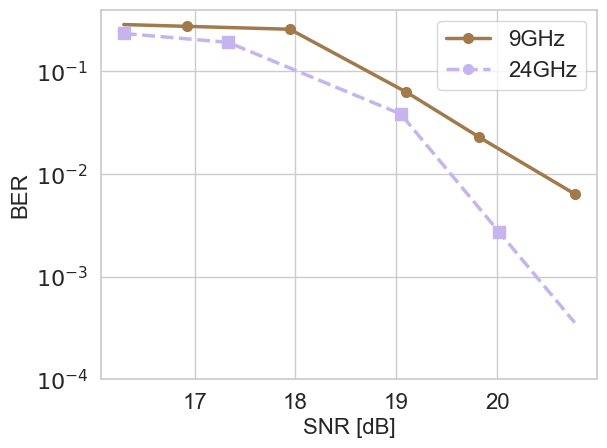

In [12]:
file = './Data/benchmark_result.csv'
df = pd.read_csv(file)
df_40 = df[df['band']==9]
df_50 = df[df['band']==24]

snr_9G = df_40['snr'].to_numpy()
snr_24G = df_50['snr'].to_numpy()

BER_9G = df_40['BER'].to_numpy()
BER_24G = df_50['BER'].to_numpy()

BER_9G_log = np.log10(BER_9G)
BER_24G_log = np.log10(BER_24G)

# Linear interpolation function for each dataset
interp_4 = interp1d(snr_9G, BER_9G_log, kind='linear', fill_value='extrapolate')
interp_5 = interp1d(snr_24G, BER_24G_log, kind='linear', fill_value='extrapolate')

# Generate new x values for a smoother curve
snr_interp = np.linspace(min(min(snr_9G), min(snr_24G)), max(max(snr_9G), max(snr_24G)), 1000)

# Interpolate y values using the linear interpolation functions
BER_interp_4 = interp_4(snr_interp)
BER_interp_5 = interp_5(snr_interp)

# Plotting

# Plot original data points
plt.scatter(snr_24G, BER_24G_log, color=color_map[2], marker='s', s=70)

# Plot interpolated curves
marker_on_4 = find_closest_pt_idx(snr_interp, snr_9G)
plt.plot(snr_interp, BER_interp_4, label='9GHz', marker='o', markevery=marker_on_4, color=color_map[1], linestyle='solid', linewidth=2.5, markersize=7)
marker_on_5 = find_closest_pt_idx(snr_interp, snr_24G)
plt.plot(snr_interp, BER_interp_5, label='24GHz', marker='o', markevery=marker_on_5, color=color_map[2], linestyle='--', linewidth=2.5, markersize=7)

# Set labels and title
plt.xlabel('SNR [dB]', fontsize=16)
plt.ylabel('BER', fontsize=16)
plt.yticks([-1, -2, -3, -4], ['$10^{-1}$', '$10^{-2}$', '$10^{-3}$', '$10^{-4}$'], fontsize=16)
plt.xticks(fontsize=16)

# Add legend
plt.legend(fontsize=16)

# Show the plot
plt.grid(True)

### T_chirp over beat frequency output

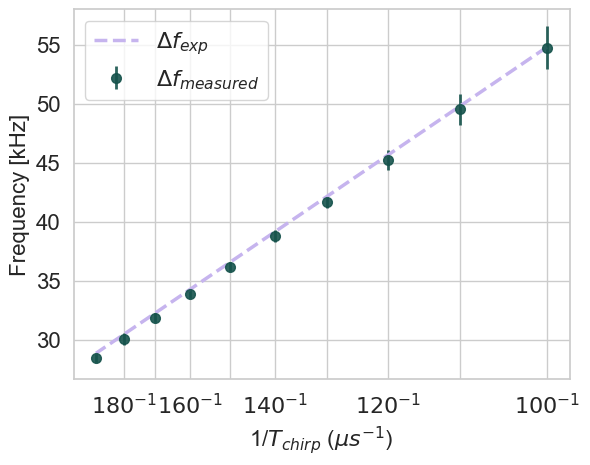

In [14]:
compiled_file_path = './Data/compiled_result_dec_23.xlsx'
df = pd.read_excel(compiled_file_path)
chirp_durs = df['chirp_dur'].to_numpy()
freq_mean = df['mean']
freq_std = df['std']
freq_max = df['max']
freq_min = df['min']
freq_exp = df['expected']

x_values = 1/chirp_durs
mean_values = freq_mean/1000
std_values = freq_std/1000
max_value = freq_max/1000
min_values = freq_min/1000
exp_values = freq_exp/1000

# Add error bars using min and max values
plt.errorbar(x_values, mean_values, yerr=[(max_val - min_val)/2 for max_val, min_val in zip(max_value, min_values)], fmt='o', alpha=0.9, label='$\Delta f_{measured}$', color=color_map[0], elinewidth=2, markersize=7)
plt.plot(x_values, exp_values, '--', label='$\Delta f_{exp}$', color=color_map[2], linewidth=2.5)
plt.legend(fontsize=16)
plt.ylabel('Frequency [kHz]', fontsize=16)
plt.xlabel("1/$T_{chirp}$ ($\mu s^{-1}$)", fontsize=16)
plt.xticks(x_values[[0,1,2,3,4,5,6,7, 8]], ['$100^{-1}$', '', '$120^{-1}$','', '$140^{-1}$','', '$160^{-1}$', '','$180^{-1}$'], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)

### approach

25002155.358219147


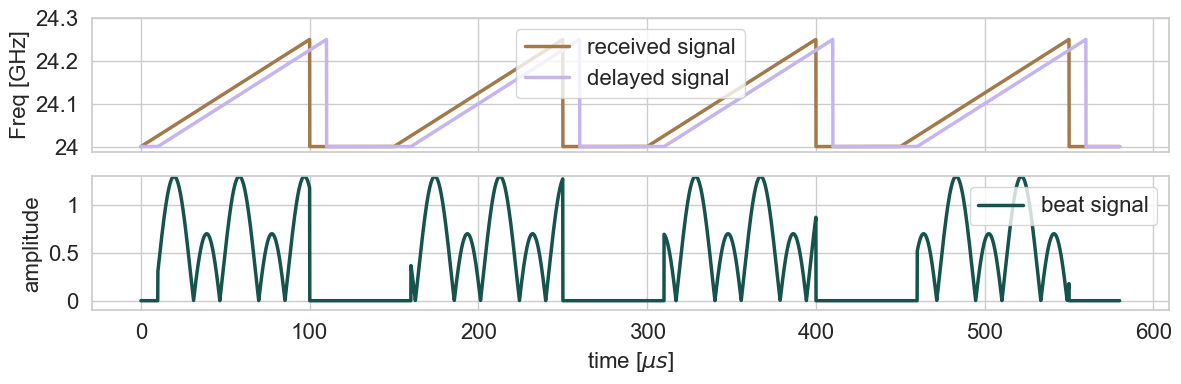

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def get_bf_gt(cable_length, band_width, period):
    inch2meter = 0.0254
    c = 2.98e8

    slope = band_width / period

    length = cable_length*inch2meter 
    speed_signal = c*2/3

    control_delay = length / speed_signal
    f_beat = control_delay * slope

    return f_beat

# defining the delay function
def delay_signal(signal, t, T_sample):
    num_points = int(t / T_sample)
    delayed_signal = np.roll(signal, num_points)
    return delayed_signal

################################### defining the parameters ##################################
chirp_dur_ = 100
band_width_ = 250
delay_ = 50

chirp_dur = chirp_dur_ * 1e-6
band_width = band_width_ * 1e6
delay = delay_ * 1e-6

period = chirp_dur+delay
f_0 = 24*1e9               #start frequency 2.4MHz

cable_len = 81

fs = 20e6
T_sample = 1/fs
size = 400*29

t = np.linspace(0, T_sample*size, size)

# defining FMCW frequency function
def f_t(t, f_0, band_width, chirp_dur, period):
    m_w = band_width/chirp_dur
    return f_0 + np.array([m_w*(t_sample % period) if t_sample % period < chirp_dur else 0 for t_sample in t])

FMCW_freq = f_t(t, f_0, band_width, chirp_dur, period)

c=2.98e8
length = cable_len*0.0254 
speed_signal = c*2/3

control_delay = length / speed_signal

TOF = control_delay
FMCW_freq_delay = delay_signal(FMCW_freq, 10e-6, T_sample)




################################ modeling time domain signal ####################################
exp_freq = get_bf_gt(cable_length=cable_len, band_width=band_width, period= chirp_dur)

out_sig = np.abs(np.sin(2*np.pi*exp_freq*t) + 0.3)
# out_sig = np.sin(2*np.pi*exp_freq*t)/2+0.5


duty_cycle = (chirp_dur-10e-6) / period
out_square = (signal.square(2*np.pi*1/period * t, duty=duty_cycle)+1)/2

exp_x = out_sig*out_square

freq_diff = np.abs(FMCW_freq-FMCW_freq_delay)
print(freq_diff[600])
condition = (np.arange(len(freq_diff)) % 3000 > 200) & (np.arange(len(freq_diff)) % 3000 < 2000)
freq_diff[condition]=0
inter_chirp_signal = np.abs(np.sin(2*np.pi*freq_diff*t))
# plt.plot(inter_chirp_signal)


exp_x = delay_signal(exp_x, 10e-6, T_sample) #+ inter_chirp_signal

# Create a 2x1 grid for the subplots
fig = plt.figure(figsize=(12, 4))
# fig = plt.figure()

gs = GridSpec(2, 1, height_ratios=[1, 1])  # Specify the height ratios for the subplots

# Upper subplot (index 0)
ax1 = fig.add_subplot(gs[1])
ax1.plot(t*1e6, exp_x, label='beat signal', color=color_map[0], linewidth=2.5)
ax1.set_xlabel('time [$\mu s$]', fontsize=16)
ax1.set_ylabel('amplitude', fontsize=16)
ax1.set_ylim([-0.1,1.3])
ax1.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=16)
ax1.set_xticks([0, 100,200,300,400,500,600], [0, 100,200,300,400,500,600], fontsize=16)
ax1.legend(fontsize=16)
# ax1.grid(which='major')
ax1.grid(True)


# Lower subplot (index 1)
ax2 = fig.add_subplot(gs[0])
ax2.plot(t*1e6, FMCW_freq, label='received signal', color=color_map[1], linewidth=2.5)
ax2.plot(t*1e6, FMCW_freq_delay, label='delayed signal', color=color_map[2], linewidth=2.5)
# ax2.set_xlabel('time (us)')
ax2.set_ylabel('Freq [GHz]', fontsize=16)
ax2.set_yticks([24e9, 24.1e9, 24.2e9, 24.3e9], [24, 24.1, 24.2, 24.3], fontsize=16)
ax2.set_xticks([0, 100, 200, 300, 400, 500, 600], [])
ax2.legend(fontsize=16)
ax2.grid(which='major')
ax2.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
# plt.grid(True)
plt.show()


25890.10067114094
[25201.46520147]


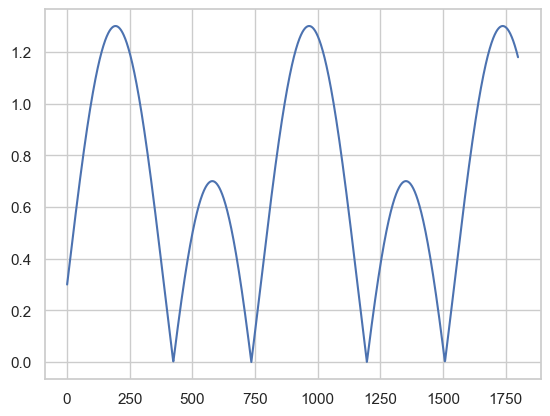

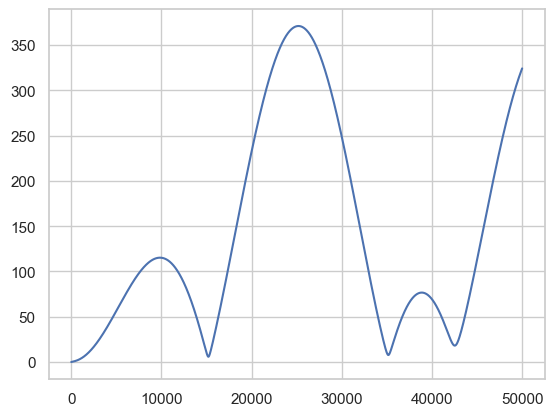

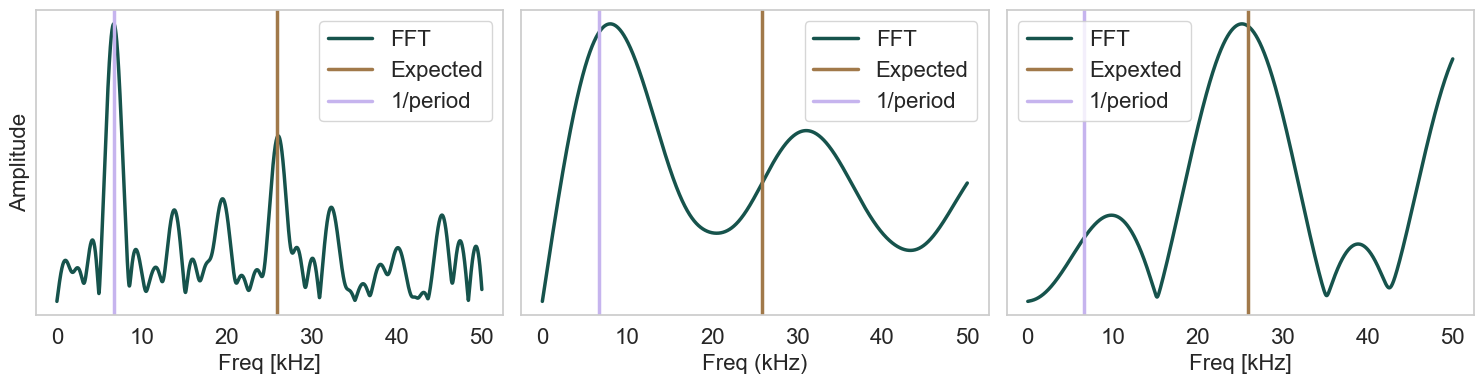

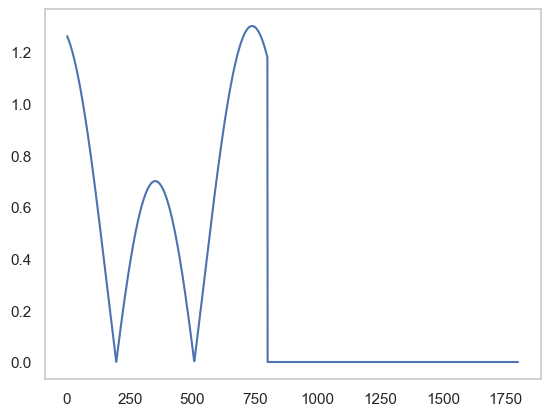

In [17]:
plt.plot(exp_x[200:2000])
w, H = zoom_fft(exp_x[200:2000]-np.mean(exp_x[200:2000]), fs=20e6, max_freq=5e4, nfft=2**12)
plt.figure()    
plt.plot(w,np.abs(H))
print(exp_freq)

peaks, _ = signal.find_peaks(np.abs(H), height=300)
print(w[peaks])

gs = plt.GridSpec(1, 3, width_ratios=[1,1,1])
fig = plt.figure(figsize=(15,4))

# defining expected frequency and 1/period of signal
exp_freq = get_bf_gt(cable_length=81, band_width=250e6, period=100e-6)
period = 150e-6

# defining first FFT area
area_1 = exp_x[200:2000]
w1, H1 = zoom_fft(area_1-np.mean(area_1), fs=20e6, max_freq=5e4, nfft=2**12)

# plotting area 1
ax1 = fig.add_subplot(gs[2])
ax1.plot(w1, np.abs(H1), color=color_map[0], label='FFT', linewidth=2.5)
ax1.axvline(x=exp_freq, color=color_map[1], label='Expexted', linewidth=2.5)
ax1.axvline(x=1/period, color=color_map[2], label='1/period', linewidth=2.5)
plt.xlabel('Freq [kHz]', fontsize=16)
ax1.set_xticks([0,10000,20000,30000,40000,50000], [0,10,20,30,40,50], fontsize=16)
ax1.set_yticks([])
# plt.ylabel('Amplitude', fontsize=14)
ax1.legend(fontsize=16)
ax1.grid(False)

# defining second FFT area
area_2 = exp_x[:]
w2, H2 = zoom_fft(area_2-np.mean(area_2), fs=20e6, max_freq=5e4, nfft=2**12)

# plotting area 2
ax2 = fig.add_subplot(gs[0])
ax2.plot(w2, np.abs(H2), color=color_map[0], label='FFT', linewidth=2.5)
ax2.axvline(x=exp_freq, color=color_map[1], label='Expected', linewidth=2.5)
ax2.axvline(x=1/period, color=color_map[2], label='1/period', linewidth=2.5)
plt.xlabel('Freq [kHz]', fontsize=16)
ax2.set_ylabel("Amplitude", fontsize=16)
ax2.set_xticks([0,10000,20000,30000,40000,50000], [0,10,20,30,40,50], fontsize=16)
ax2.set_yticks([])
ax2.legend(fontsize=16)
ax2.grid(False)

# defining third FFT area
area_3 = exp_x[1200:3000]
w3, H3 = zoom_fft(area_3-np.mean(area_3), fs=20e6, max_freq=5e4, nfft=2**12)
# plotting area 1
ax3 = fig.add_subplot(gs[1])
ax3.plot(w3, np.abs(H3), color=color_map[0], label='FFT', linewidth=2.5)
ax3.axvline(x=exp_freq, color=color_map[1], label='Expected', linewidth=2.5)
ax3.axvline(x=1/period, color=color_map[2], label='1/period', linewidth=2.5)
plt.xlabel('Freq (kHz)', fontsize=16)
ax3.set_xticks([0,10000,20000,30000,40000,50000], [0,10,20,30,40,50], fontsize=16)
ax3.set_yticks([])
ax3.legend(fontsize=16)
ax3.grid(False)
plt.tight_layout()

plt.figure()
plt.plot(area_3)

plt.grid(False)
